# Independent Component Analysis

DataFun

Members:
Jan Botscch
Fabian Frank
David Munkacsi

In [1]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import pandas as pd

# 5.1 Initalization

In [2]:
#defines
samplerate = 8192
N = 2
p = 18000

#load the data
dataSet1 = np.loadtxt('./sounds/sound1.dat')
dataSet2 = np.loadtxt('./sounds/sound2.dat')
s = np.stack([dataSet1, dataSet2], axis=0)

# create random and invertible NxN (2x2) matrix
while True:
    A = np.random.rand(2,2)
    if np.linalg.det(A) != 0.0:
        break
print("A=" + str(A))

#mix the sources
x = np.matmul(A, s)

# remove temporal structure by permutation 
x_per = x[:, np.random.permutation(range(0,p))]

#calculate correlation between sources and mixtures
s_std = np.std(s,axis=1)
x_per_std = np.std(x_per,axis=1)
print(s_std)
print(x_per_std) 

corr = np.zeros((2, 2))
for i in range(0,2):
    for j in range(0,2):
        #print("i=" + str(i) + " j=" + str(j))
        corr[i,j] = np.cov(s[i,:], x_per[j,:])[0][1] / (s_std[i] * x_per_std[j])
        #print(np.cov(s[i,:], x_per[j,:]))
        #print("corr[i,j]=" + str(corr[i,j]))
print("correlations=" + str(corr))

#center the data
mean = np.mean(x_per,axis=1, keepdims=True)
x_per = x_per - mean;
print("\n mean: " + str(mean))

#initialize W at random
W = np.random.rand(2,2)
W_nat = np.copy(W)
print("W_nat=" + str(W_nat))


A=[[ 0.48290735  0.24478318]
 [ 0.8273677   0.59275825]]
[ 0.99854594  0.99885435]
[ 0.54092571  1.01702449]
correlations=[[-0.01519174 -0.0156953 ]
 [ 0.00596643  0.00637405]]

 mean: [[ 0.00368504]
 [ 0.00850689]]
W_nat=[[ 0.28886454  0.69417968]
 [ 0.64317089  0.18435498]]


# 5.2 Optimization

In [3]:
#function that calculates f''/f' 
def stepSigmoid(y):
	return 1 - 2 * (1 / (1 + np.exp(-y)))

#vectorize function
vStepSigmoid = np.vectorize(stepSigmoid)

#perform ica
eps = 0.01
for i in range(0,p):
    #normal gradient
    dW = np.linalg.inv(W).T + np.outer(vStepSigmoid(np.dot(W,x_per[:,i])),x_per[:,i])
    W = W + eps * dW
    #natural gradient
    dW_nat = np.linalg.inv(W_nat).T + np.outer(vStepSigmoid(np.dot(W_nat,x_per[:,i])),x_per[:,i])
    W_nat = W_nat + eps * dW_nat * (np.matmul(W_nat.T, W_nat))
    
print("W final=" + str(W))
print("W_nat final=" + str(W))

# get the unmixed signals
unmixedNormal = np.matmul(W, x)
unmixedNatural = np.matmul(W_nat, x)


W final=[[ -1.49062594   2.56656195]
 [ 13.93174123  -7.1987555 ]]
W_nat final=[[ -1.49062594   2.56656195]
 [ 13.93174123  -7.1987555 ]]


## 5.3 Results

(a) Plot and Play

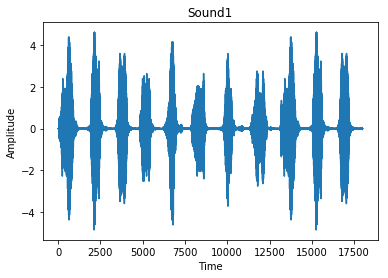

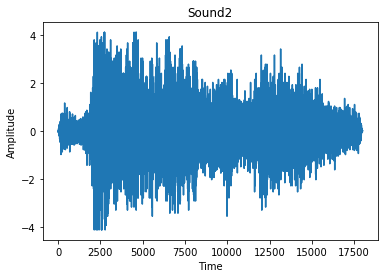

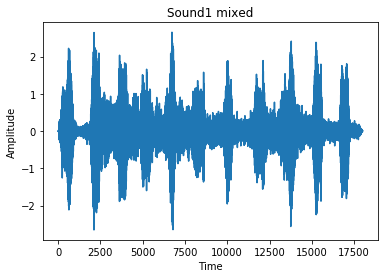

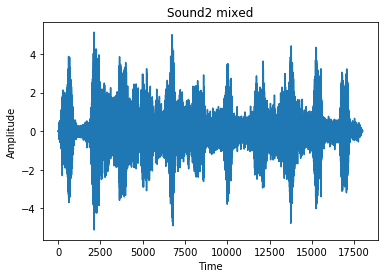

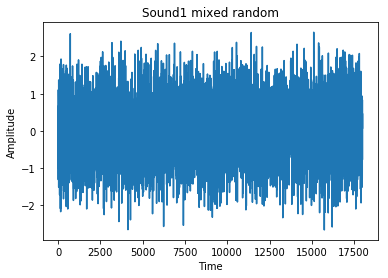

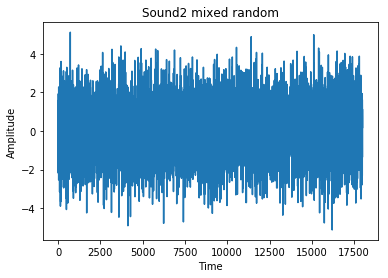

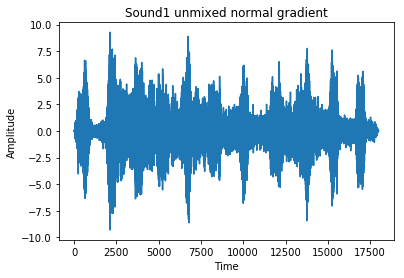

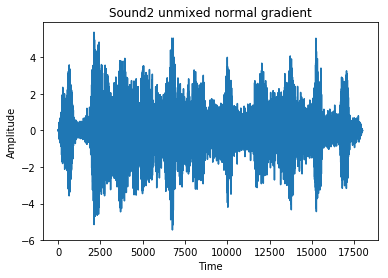

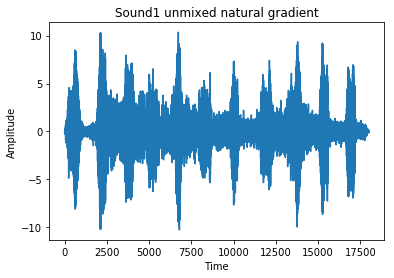

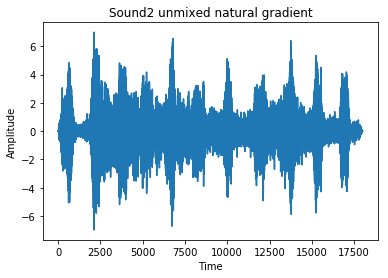

In [4]:
# Original sounds.
wav.write('Source1.wav',8192,dataSet1)
wav.write('Source2.wav',8192,dataSet2)

# Mixed sounds.
wav.write('Mixed1.wav',8192,x[0,:])
wav.write('Mixed2.wav',8192,x[1,:])

# Mixed and permutated.
wav.write('MixedPerm1.wav',8192,x_per[0,:])
wav.write('MixedPerm2.wav',8192,x_per[1,:])

# Unmixed with normal gradient.
wav.write('UnmixedNormGrad1.wav',8192,unmixedNormal[0,:])
wav.write('UnmixedNormGrad2.wav',8192,unmixedNormal[1,:])

# Unmixed with natural gradient.
wav.write('UnmixedNatGrad1.wav',8192,unmixedNatural[0,:])
wav.write('UnmixedNatGrad2.wav',8192,unmixedNatural[1,:])

plt.figure()
plt.plot(dataSet1)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound1')

plt.figure()
plt.plot(dataSet2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound2')

plt.figure()
plt.plot(x[0,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound1 mixed')
plt.figure()
plt.plot(x[1,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound2 mixed')

plt.figure()
plt.plot(x_per[0,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound1 mixed random')
plt.figure()
plt.plot(x_per[1,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound2 mixed random')

plt.figure()
plt.plot(unmixedNormal[0,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound1 unmixed normal gradient')
plt.figure()
plt.plot(unmixedNormal[1,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound2 unmixed normal gradient')

plt.figure()
plt.plot(unmixedNatural[0,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound1 unmixed natural gradient')
plt.figure()
plt.plot(unmixedNatural[1,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound2 unmixed natural gradient')
plt.show()

(b) Calculate correlations between the true sources and the estimations

(c) Comparing learning speed, data whitening

(d) Plotting density